In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_columns", 101)

In [2]:
# Credit: The reduce_mem_usage function has been taken from 
# https://gist.github.com/tkazusa/4d9e26d403c73755edc6b77b5b053a43
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and str(col_type)!= 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
sales_train_validation_data = pd.read_csv('data/sales_train_validation.csv')
sales_train_validation_data = reduce_mem_usage(sales_train_validation_data)
calendar_data = pd.read_csv('data/calendar.csv')
calendar_data = reduce_mem_usage(calendar_data)
prices_data = pd.read_csv('data/sell_prices.csv')
prices_data = reduce_mem_usage(prices_data)

Memory usage of dataframe is 446.40 MB
Memory usage after optimization is: 95.42 MB
Decreased by 78.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.22 MB
Decreased by -5.7%
Memory usage of dataframe is 208.77 MB
Memory usage after optimization is: 45.77 MB
Decreased by 78.1%


In [4]:
d_colnames = []
for i in range(1, 1914):
    d_colnames.append('d_'+str(i))
sales_train_validation_data_new = pd.melt(sales_train_validation_data, \
        id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
        value_vars=d_colnames, var_name='day_number', value_name='units_sold')
sales_train_validation_data_new['day_number'] = \
    sales_train_validation_data_new['day_number'].apply(lambda x: int(x[2:]))
sales_train_validation_data_new = reduce_mem_usage(sales_train_validation_data_new)
sales_train_validation_data_new

Memory usage of dataframe is 1002.84 MB
Memory usage after optimization is: 669.09 MB
Decreased by 33.3%


,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,1,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,1,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,1,2
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,1,0


In [5]:
calendar_data['d'] = \
    calendar_data['d'].apply(lambda x: int(x[2:]))
merged_df = sales_train_validation_data_new.merge(calendar_data, left_on='day_number', right_on='d', how='left')
merged_df = reduce_mem_usage(merged_df)
del calendar_data
del sales_train_validation_data
del sales_train_validation_data_new
gc.collect() # Garbage collector

Memory usage of dataframe is 2449.29 MB
Memory usage after optimization is: 2115.63 MB
Decreased by 13.6%


62

In [6]:
df = merged_df.merge(
    prices_data, left_on=['store_id', 'item_id', 'wm_yr_wk'],
    right_on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left')
df = reduce_mem_usage(df)

Memory usage of dataframe is 2226.88 MB
Memory usage after optimization is: 2226.88 MB
Decreased by 0.0%


In [7]:
del merged_df
del prices_data
gc.collect()

89

In [8]:
df.drop(['wday', 'd', 'wm_yr_wk'], inplace=True, axis=1)
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.week
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold,date,weekday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,week
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4


In [9]:
df.to_pickle("./data.pkl")

In [3]:
# Testing if pickle (serializing) the dataframe to file has worked
unpickled_df = pd.read_pickle("./data.pkl")
unpickled_df

,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold,date,weekday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,week
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,4
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961,4
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,1,2,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.559570,4
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,Saturday,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.169922,4


In [4]:
# We assume that the first 1000 days of data will not be relevant to forecast future sales since 
# this data is very old
unpickled_df = unpickled_df[unpickled_df.day_number.astype(int) > 972]
len(unpickled_df)

28691090

In [5]:
# Check if both event_name_1 and event_name_2 are populated for any rows
unpickled_df[~unpickled_df.event_name_1.isnull() & ~unpickled_df.event_name_2.isnull()]

,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold,date,weekday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,week
35886730,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,8.257812,16
35886731,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,3.970703,16
35886732,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,2.970703,16
35886733,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1178,4,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,4.640625,16
35886734,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1178,3,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,3.080078,16
35886735,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,1.000000,16
35886736,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,7.878906,16
35886737,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1178,3,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,0.459961,16
35886738,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,1178,4,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,1.769531,16
35886739,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,1178,0,2014-04-20,Sunday,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,2.970703,16


In [6]:
first_product = unpickled_df.loc[unpickled_df.item_id == 'HOBBIES_1_001'].copy()
first_product

,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold,date,weekday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,week
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,973,2,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.617188,39
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.617188,39
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,0,0,0,8.257812,39


In [7]:
# We consolidate 3 snap columns into 1, as one row corresponds to one state only,
# so we don't really care about the corresponding state values for other states for that row
def snap(row):
    if row['snap_'+ row.state_id] == 1:
        return 1
    return 0

first_product['snap'] = first_product.apply(snap, axis=1)
first_product.drop(['snap_CA', 'snap_WI', 'snap_TX'], axis=1, inplace=True)
first_product

,id,item_id,dept_id,cat_id,store_id,state_id,day_number,units_sold,date,weekday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,973,2,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,973,1,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.617188,39,0
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.617188,39,0
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,973,0,2013-09-27,Friday,9,2013,NaN,NaN,NaN,NaN,8.257812,39,0


In [8]:
unpickled_df.dept_id.value_counts()

FOODS_3        7744430
HOUSEHOLD_1    5006120
HOUSEHOLD_2    4846150
HOBBIES_1      3914560
FOODS_2        3745180
FOODS_1        2032560
HOBBIES_2      1402090
Name: dept_id, dtype: int64

In [9]:
unpickled_df.cat_id.value_counts()

FOODS        13522170
HOUSEHOLD     9852270
HOBBIES       5316650
Name: cat_id, dtype: int64

In [10]:
# We can drop:
# cat_id as dept_id already contains category name
# state_id as store_id already contains state
# day_number as it is just a number which will not be useful for modelling
# date and year
first_product.drop(['cat_id', 'state_id', 'date', 'year'], axis=1, inplace=True)
first_product

,id,item_id,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0


In [11]:
first_product['units_lag_28'] = first_product.groupby('id')['units_sold'].transform(
    lambda x: x.shift(28, fill_value=0)
)
first_product

,id,item_id,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap,units_lag_28
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0


In [12]:
# https://pbpython.com/pandas_transform.html

# Rolling units sold for days -28 to -34
first_product['units_rolling_7'] = first_product.groupby('id')['units_lag_28'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
# Rolling units sold for days -28 to -55
first_product['units_rolling_28'] = first_product.groupby('id')['units_lag_28'].transform(
    lambda x: x.rolling(28, min_periods=1).mean()
)
# Rolling units sold for days -28 to -76
first_product['units_rolling_49'] = first_product.groupby('id')['units_lag_28'].transform(
    lambda x: x.rolling(49, min_periods=1).mean()
)
first_product

,id,item_id,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000


In [13]:
first_product['sell_price_lag_28'] = first_product.groupby('id')['sell_price'].transform(
    lambda x: x.shift(28, fill_value=0)
)
first_product

,id,item_id,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_lag_28
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,0.000000
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,0.000000
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000


In [14]:
first_product['sell_price_diff'] = first_product['sell_price_lag_28'] - first_product['sell_price']
first_product

,id,item_id,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_lag_28,sell_price_diff
29636280,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29639329,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29642378,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29645427,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29648476,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29651525,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29654574,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.617188
29657623,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812
29660672,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.617188
29663721,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,0.000000,-8.257812


In [15]:
first_product.drop('sell_price_lag_28', axis=1, inplace=True)

In [16]:
first_product.drop(['id', 'item_id'], axis=1, inplace=True)
first_product

,dept_id,store_id,day_number,units_sold,weekday,month,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,week,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff
29636280,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29639329,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29642378,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29645427,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29648476,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29651525,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29654574,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,-8.617188
29657623,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812
29660672,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,NaN,NaN,8.617188,39,0,0,0.000000,0.000000,0.000000,-8.617188
29663721,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,NaN,NaN,8.257812,39,0,0,0.000000,0.000000,0.000000,-8.257812


In [17]:
first_product.drop(['event_name_1', 'event_name_2', 'week'], axis=1, inplace=True)

In [18]:
categorical_cols = ['weekday', 'month']
for col in categorical_cols:
    first_product[col] = first_product[col].astype('category')

In [19]:
first_product.reset_index(drop=True, inplace=True)
first_product.head(10)

,dept_id,store_id,day_number,units_sold,weekday,month,event_type_1,event_type_2,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff
0,HOBBIES_1,CA_1,973,1,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
1,HOBBIES_1,CA_2,973,0,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
2,HOBBIES_1,CA_3,973,1,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
3,HOBBIES_1,CA_4,973,2,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
4,HOBBIES_1,TX_1,973,0,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
5,HOBBIES_1,TX_2,973,0,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
6,HOBBIES_1,TX_3,973,1,Friday,9,NaN,NaN,8.617188,0,0,0.0,0.0,0.0,-8.617188
7,HOBBIES_1,WI_1,973,0,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812
8,HOBBIES_1,WI_2,973,0,Friday,9,NaN,NaN,8.617188,0,0,0.0,0.0,0.0,-8.617188
9,HOBBIES_1,WI_3,973,0,Friday,9,NaN,NaN,8.257812,0,0,0.0,0.0,0.0,-8.257812


In [20]:
first_product.dtypes

dept_id             category
store_id            category
day_number          category
units_sold             int16
weekday             category
month               category
event_type_1        category
event_type_2        category
sell_price           float16
snap                   int64
units_lag_28           int16
units_rolling_7      float64
units_rolling_28     float64
units_rolling_49     float64
sell_price_diff      float16
dtype: object

In [21]:
encoded_cols = pd.get_dummies(first_product[[
    'dept_id', 'store_id', 'weekday', 'month', 'event_type_1', 'event_type_2'
]]).reset_index(drop=True)
first_product.drop(['dept_id', 'weekday', 'month', 'event_type_1', 'event_type_2'], axis=1, inplace=True)
first_product = pd.concat([first_product, encoded_cols], axis=1)
first_product.head()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
0,CA_1,973,1,8.257812,0,0,0.0,0.0,0.0,-8.257812,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,CA_2,973,0,8.257812,0,0,0.0,0.0,0.0,-8.257812,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,CA_3,973,1,8.257812,0,0,0.0,0.0,0.0,-8.257812,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,CA_4,973,2,8.257812,0,0,0.0,0.0,0.0,-8.257812,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,TX_1,973,0,8.257812,0,0,0.0,0.0,0.0,-8.257812,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
len(encoded_cols) == len(first_product)

True

In [23]:
# Keep only non-zero rolling value rows
first_product = first_product[first_product.day_number.astype(int) > 1000]
first_product.head()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
280,CA_1,1001,2,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
281,CA_2,1001,0,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
282,CA_3,1001,2,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
283,CA_4,1001,0,8.257812,0,2,0.285714,0.071429,0.068966,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
284,TX_1,1001,0,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Divide into training and validation set

In [24]:
# Time series split so we cannot shuffle
first_product_train = first_product[first_product.day_number.astype(int) <= 1885].reset_index(drop=True) # 1913-28
first_product_validation = first_product[first_product.day_number.astype(int) > 1885].reset_index(drop=True)

In [25]:
first_product_validation.head()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
0,CA_1,1886,1,8.257812,0,0,1.142857,1.000000,0.897959,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CA_2,1886,0,8.257812,0,0,0.714286,0.642857,0.653061,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CA_3,1886,2,8.257812,0,0,0.571429,0.928571,0.734694,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CA_4,1886,2,8.257812,0,2,1.000000,0.857143,0.836735,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TX_1,1886,1,8.257812,0,0,0.285714,0.214286,0.204082,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
first_product_train.head()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
0,CA_1,1001,2,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,CA_2,1001,0,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,CA_3,1001,2,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,CA_4,1001,0,8.257812,0,2,0.285714,0.071429,0.068966,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,TX_1,1001,0,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [54]:
first_product_train_x = first_product_train.iloc[:, 3:]
first_product_train_y = first_product_train.units_sold
first_product_validation_x = first_product_validation.iloc[:, 3:]
first_product_validation_y = first_product_validation.units_sold

In [28]:
first_product_train_x.head()

,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
0,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8.257812,0,1,0.142857,0.035714,0.034483,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,8.257812,0,2,0.285714,0.071429,0.068966,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,8.257812,0,0,0.000000,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
first_product_train_y.head()

0    2
1    0
2    2
3    0
4    0
Name: units_sold, dtype: int16

## Calculate feature importances + try a simple random forest

In [31]:
regr = RandomForestRegressor(random_state=0)
regr.fit(first_product_train_x, first_product_train_y)

/home/asif/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
sorted_feature_importance_indices = np.argsort(regr.feature_importances_)[::-1]
print(sorted_feature_importance_indices)

[ 5  4  3  2  1 30 29 25 27 31 28 24 26 14 42 33 15 16 32 44 17 41 39 35
 37 34 40 36 19 20 38 45 18 21 23 43  0 22 46  6 48 47 11 10  9  8  7 12
 13]


In [39]:
feature_cols = first_product_train_x.columns.to_list()
feature_cols

['sell_price',
 'snap',
 'units_lag_28',
 'units_rolling_7',
 'units_rolling_28',
 'units_rolling_49',
 'sell_price_diff',
 'dept_id_FOODS_1',
 'dept_id_FOODS_2',
 'dept_id_FOODS_3',
 'dept_id_HOBBIES_1',
 'dept_id_HOBBIES_2',
 'dept_id_HOUSEHOLD_1',
 'dept_id_HOUSEHOLD_2',
 'store_id_CA_1',
 'store_id_CA_2',
 'store_id_CA_3',
 'store_id_CA_4',
 'store_id_TX_1',
 'store_id_TX_2',
 'store_id_TX_3',
 'store_id_WI_1',
 'store_id_WI_2',
 'store_id_WI_3',
 'weekday_Friday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'event_type_1_Cultural',
 'event_type_1_National',
 'event_type_1_Religious',
 'event_type_1_Sporting',
 'event_type_2_Cultural',
 'event_type_2_Religious']

In [43]:
ordered_feature_importances = [feature_cols[i] for i in sorted_feature_importance_indices]
ordered_feature_importances

['units_rolling_49',
 'units_rolling_28',
 'units_rolling_7',
 'units_lag_28',
 'snap',
 'weekday_Wednesday',
 'weekday_Tuesday',
 'weekday_Monday',
 'weekday_Sunday',
 'month_1',
 'weekday_Thursday',
 'weekday_Friday',
 'weekday_Saturday',
 'store_id_CA_1',
 'month_12',
 'month_3',
 'store_id_CA_2',
 'store_id_CA_3',
 'month_2',
 'event_type_1_National',
 'store_id_CA_4',
 'month_11',
 'month_9',
 'month_5',
 'month_7',
 'month_4',
 'month_10',
 'month_6',
 'store_id_TX_2',
 'store_id_TX_3',
 'month_8',
 'event_type_1_Religious',
 'store_id_TX_1',
 'store_id_WI_1',
 'store_id_WI_3',
 'event_type_1_Cultural',
 'sell_price',
 'store_id_WI_2',
 'event_type_1_Sporting',
 'sell_price_diff',
 'event_type_2_Religious',
 'event_type_2_Cultural',
 'dept_id_HOBBIES_2',
 'dept_id_HOBBIES_1',
 'dept_id_FOODS_3',
 'dept_id_FOODS_2',
 'dept_id_FOODS_1',
 'dept_id_HOUSEHOLD_1',
 'dept_id_HOUSEHOLD_2']

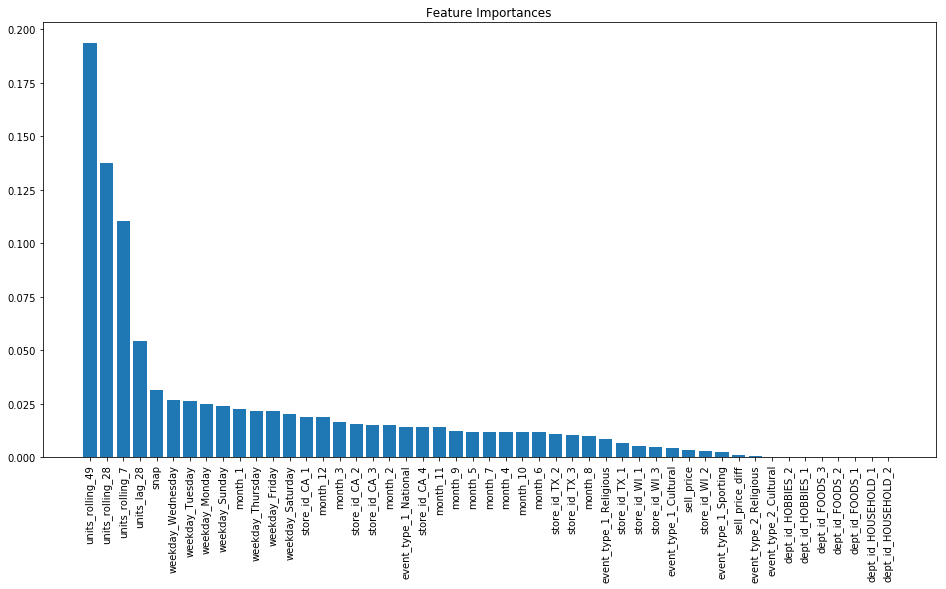

In [48]:
plt.figure(figsize=(16,8))
plt.title("Feature Importances")
plt.bar(range(first_product_train_x.shape[1]), regr.feature_importances_[sorted_feature_importance_indices])
plt.xticks(range(first_product_train_x.shape[1]), ordered_feature_importances, rotation=90)
plt.show()

In [67]:
preds = np.round(regr.predict(first_product_validation_x))
preds

array([1., 1., 1., 1., 0., 0., 2., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 2., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 2., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1.

In [68]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(first_product_validation_y.values, preds))

0.9430194665465365

In [60]:
np.average(first_product_validation_y.values)

0.5178571428571429

In [69]:
preds.shape

(280,)

In [70]:
first_product_validation_x.shape

(280, 49)

In [ ]:
# Next: generate test data for the next 28 days (3049 products, 10 stores) in this format
# combine predictions for a few products